In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
sns.set()
sns.set_palette("husl")

# Load User-Defined Functions:

# Load in Matrix:

In [2]:
referenceDF = pd.read_csv('Data_To_Share/sequence_level_data_Jurkat_T0T2T4T6.csv')
referenceDF_logratio = pd.read_csv('Data_To_Share/sequence_level_data_Jurkat_T0T4_logRatios.csv')

In [3]:
#Some of the CXCL7 padding sequences have AREs -- we can account for these if desired...

cxcl7_list = ['SUPV3L1|10:70968792-70968830','TRPT1|11:63991271-63991346','ART4|12:14982266-14982303','POLE2|14:50116899-50116969','NMRAL1|16:4511716-4511779','ADPRM|17:10614462-10614520','NUP85|17:73231775-73231829','PPP1R15A|19:49379231-49379294','PQLC3|2:11300834-11300874','FASTKD1|2:170386287-170386333','TFPI|2:188343337-188343401','YBEY|21:47717549-47717616','ALG1L|3:125648118-125648193','HELQ|4:84328529-84328604','TMEM171|5:72427558-72427617','IL4|5:132018280-132018347','PCDHA11|5:140251122-140251185','PCDHA12|5:140257437-140257474','GIN1|5:102423545-102423600','HLA-DQA1|6:32610542-32610561','CCDC132|7:92905660-92905721','NAPRT|8:144656955-144657006']
CXCL7_ARE_list = []
for region in referenceDF.region:
    if region in cxcl7_list:
        CXCL7_ARE_list.append(1)
    else:
        CXCL7_ARE_list.append(0)
referenceDF['CXCL7_ARE']=CXCL7_ARE_list

In [5]:
len(cxcl7_list),sum(CXCL7_ARE_list)

(22, 60)

# Figures!

/Users/davidsiegel/opt/anaconda3/envs/statsmodels_env/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/davidsiegel/opt/anaconda3/envs/statsmodels_env/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/davidsiegel/opt/anaconda3/envs/statsmodels_env/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


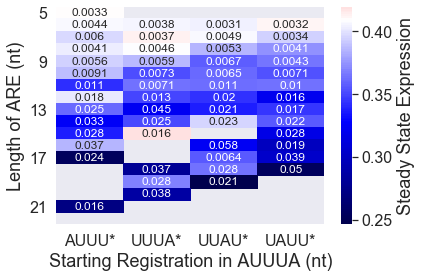

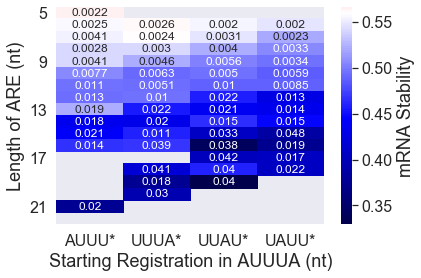

In [4]:
# Sensored Data (nan if SEM is too large):
perfect_ratio_T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_ratio_T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_ratio_T0_map[length-5,registration]=np.mean(referenceDF.ratios_T0_GC_resid[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])
        perfect_stderr_ratio_T0_map[length-5,registration]=st.sem(referenceDF.ratios_T0_GC_resid[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])
        if not pd.isnull(perfect_stderr_ratio_T0_map[length-5,registration]):
            if perfect_stderr_ratio_T0_map[length-5,registration]>0.06:
                perfect_ratio_T0_map[length-5,registration] = np.nan
                perfect_stderr_ratio_T0_map[length-5,registration] = np.nan
        else:
            perfect_ratio_T0_map[length-5,registration] = np.nan

perfect_ratio_T4T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_ratio_T4T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_ratio_T4T0_map[length-5,registration]=np.mean(referenceDF.ratios_T4T0_GC_resid[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])
        perfect_stderr_ratio_T4T0_map[length-5,registration]=st.sem(referenceDF.ratios_T4T0_GC_resid[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])
        if not pd.isnull(perfect_stderr_ratio_T4T0_map[length-5,registration]):
            if perfect_stderr_ratio_T4T0_map[length-5,registration]>0.06:
                perfect_ratio_T4T0_map[length-5,registration] = np.nan
                perfect_stderr_ratio_T4T0_map[length-5,registration] = np.nan
        else:
            perfect_ratio_T4T0_map[length-5,registration] = np.nan
        
        
ax = sns.heatmap(perfect_ratio_T0_map,yticklabels=range(5,23), annot = perfect_stderr_ratio_T0_map,cmap = 'seismic',center = np.mean(referenceDF.ratios_T0_GC_resid[~pd.isnull(referenceDF.ratios_T0_GC_resid)&pd.isnull(referenceDF.ARE_registration_perfect)]))
plt.ylabel('Length of ARE (nt)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
plt.xlabel('Starting Registration in AUUUA (nt)',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("Steady State Expression",fontsize=18)
plt.show()

ax = sns.heatmap(perfect_ratio_T4T0_map,yticklabels=range(5,23), annot = perfect_stderr_ratio_T4T0_map,cmap = 'seismic',center = np.mean(referenceDF.ratios_T4T0_GC_resid[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&pd.isnull(referenceDF.ARE_registration_perfect)]))
plt.ylabel('Length of ARE (nt)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
plt.xlabel('Starting Registration in AUUUA (nt)',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("mRNA Stability",fontsize=18)
plt.show()



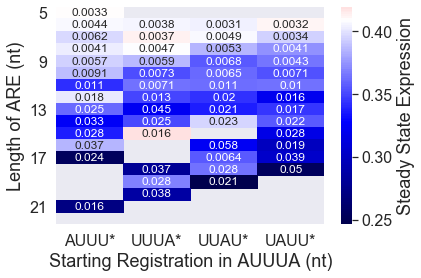

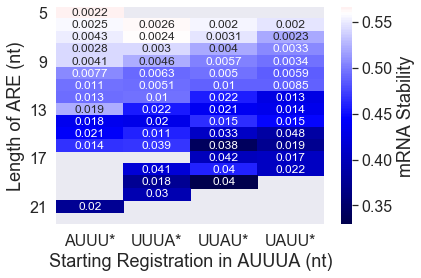

In [5]:
#CXCL7

# Sensored Data (nan if SEM is too large):
perfect_ratio_T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_ratio_T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_ratio_T0_map[length-5,registration]=np.mean(referenceDF.ratios_T0_GC_resid[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)&(referenceDF.CXCL7_ARE==0)])
        perfect_stderr_ratio_T0_map[length-5,registration]=st.sem(referenceDF.ratios_T0_GC_resid[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)&(referenceDF.CXCL7_ARE==0)])
        if not pd.isnull(perfect_stderr_ratio_T0_map[length-5,registration]):
            if perfect_stderr_ratio_T0_map[length-5,registration]>0.06:
                perfect_ratio_T0_map[length-5,registration] = np.nan
                perfect_stderr_ratio_T0_map[length-5,registration] = np.nan
        else:
            perfect_ratio_T0_map[length-5,registration] = np.nan
                
perfect_ratio_T4T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_ratio_T4T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_ratio_T4T0_map[length-5,registration]=np.mean(referenceDF.ratios_T4T0_GC_resid[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)&(referenceDF.CXCL7_ARE==0)])
        perfect_stderr_ratio_T4T0_map[length-5,registration]=st.sem(referenceDF.ratios_T4T0_GC_resid[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)&(referenceDF.CXCL7_ARE==0)])
        if not pd.isnull(perfect_stderr_ratio_T4T0_map[length-5,registration]):
            if perfect_stderr_ratio_T4T0_map[length-5,registration]>0.06:
                perfect_ratio_T4T0_map[length-5,registration] = np.nan
                perfect_stderr_ratio_T4T0_map[length-5,registration] = np.nan
        else:
            perfect_ratio_T4T0_map[length-5,registration] = np.nan

  
        
ax = sns.heatmap(perfect_ratio_T0_map,yticklabels=range(5,23), annot = perfect_stderr_ratio_T0_map,cmap = 'seismic',center = np.mean(referenceDF.ratios_T0_GC_resid[~pd.isnull(referenceDF.ratios_T0_GC_resid)&pd.isnull(referenceDF.ARE_registration_perfect)&(referenceDF.CXCL7_ARE==0)]))
plt.ylabel('Length of ARE (nt)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
plt.xlabel('Starting Registration in AUUUA (nt)',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("Steady State Expression",fontsize=18)
plt.show()

ax = sns.heatmap(perfect_ratio_T4T0_map,yticklabels=range(5,23), annot = perfect_stderr_ratio_T4T0_map,cmap = 'seismic',center = np.mean(referenceDF.ratios_T4T0_GC_resid[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&pd.isnull(referenceDF.ARE_registration_perfect)&(referenceDF.CXCL7_ARE==0)]))
plt.ylabel('Length of ARE (nt)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
plt.xlabel('Starting Registration in AUUUA (nt)',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("mRNA Stability",fontsize=18)
plt.show()



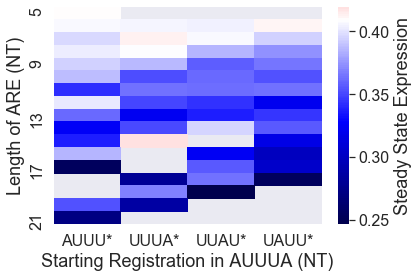

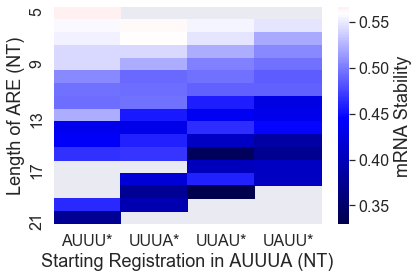

In [6]:
# No standard errors showing:
perfect_ratio_T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_ratio_T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_ratio_T0_map[length-5,registration]=np.mean(referenceDF.ratios_T0_GC_resid[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])
        perfect_stderr_ratio_T0_map[length-5,registration]=st.sem(referenceDF.ratios_T0_GC_resid[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])
        if not pd.isnull(perfect_stderr_ratio_T0_map[length-5,registration]):
            if perfect_stderr_ratio_T0_map[length-5,registration]>0.06:
                perfect_ratio_T0_map[length-5,registration] = np.nan
                perfect_stderr_ratio_T0_map[length-5,registration] = np.nan

perfect_ratio_T4T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_ratio_T4T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_ratio_T4T0_map[length-5,registration]=np.mean(referenceDF.ratios_T4T0_GC_resid[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])
        perfect_stderr_ratio_T4T0_map[length-5,registration]=st.sem(referenceDF.ratios_T4T0_GC_resid[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])
        if not pd.isnull(perfect_stderr_ratio_T4T0_map[length-5,registration]):
            if perfect_stderr_ratio_T4T0_map[length-5,registration]>0.06:
                perfect_ratio_T4T0_map[length-5,registration] = np.nan
                perfect_stderr_ratio_T4T0_map[length-5,registration] = np.nan

        
# mismatch1_ratio_T0_map = np.ones([22-4,4])*np.nan
# mismatch1_stderr_ratio_T0_map = np.ones([22-4,4])*np.nan
# for length in range(5,23):
#     for registration in range(0,4):
#         mismatch1_ratio_T0_map[length-5,registration]=np.mean(referenceDF.ratios_T0[~pd.isnull(referenceDF.ratios_T0)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])
#         mismatch1_stderr_ratio_T0_map[length-5,registration]=np.sem(referenceDF.ratios_T0[~pd.isnull(referenceDF.ratios_T0)&(referenceDF.ARE_registration_perfect==registration)&(referenceDF.ARE_length_perfect==length)])

        
ax = sns.heatmap(perfect_ratio_T0_map[:-1,],yticklabels=range(5,22), cmap = 'seismic',center = np.mean(referenceDF.ratios_T0_GC_resid[~pd.isnull(referenceDF.ratios_T0_GC_resid)&pd.isnull(referenceDF.ARE_registration_perfect)]))
plt.ylabel('Length of ARE (NT)',fontsize=18)
plt.xlabel('Starting Registration in AUUUA (NT)',fontsize=18)
# plt.title('Steady State Expression',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("Steady State Expression",fontsize=18)
plt.savefig('/Users/davidsiegel/Documents/UTR_Olivier/are_paper_figures/AREs_T0_HeatMap_Expression_Sensored_NoSE')
plt.show()

ax = sns.heatmap(perfect_ratio_T4T0_map[:-1,],yticklabels=range(5,22),cmap = 'seismic',center = np.mean(referenceDF.ratios_T4T0_GC_resid[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&pd.isnull(referenceDF.ARE_registration_perfect)]))
plt.ylabel('Length of ARE (NT)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
plt.xlabel('Starting Registration in AUUUA (NT)',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("mRNA Stability",fontsize=18)
# plt.title('mRNA Stability',fontsize=18)
plt.savefig('/Users/davidsiegel/Documents/UTR_Olivier/are_paper_figures/AREs_T4T0_HeatMap_Expression_Sensored_NoSE')
plt.show()




In [8]:
# It helps to make a "parent_ARE_length_perfect" and a "parent_ARE_registration_perfect" variable:
referenceDF_byOligo = referenceDF.copy()
referenceDF_byOligo.index = referenceDF_byOligo.ids
parent_ARE_length_perfect_list = []
parent_ARE_registration_perfect_list = []
for parent_oligo in referenceDF_byOligo.parent_control_oligo:
    if parent_oligo in referenceDF_byOligo.ids.values:
        parent_ARE_length_perfect_list.append(referenceDF_byOligo.loc[parent_oligo,'ARE_length_perfect'])
        parent_ARE_registration_perfect_list.append(referenceDF_byOligo.loc[parent_oligo,'ARE_registration_perfect'])
    else:
        parent_ARE_length_perfect_list.append(np.nan)
        parent_ARE_registration_perfect_list.append(np.nan)
referenceDF['parent_ARE_length_perfect'] = parent_ARE_length_perfect_list
referenceDF['parent_ARE_registration_perfect'] = parent_ARE_registration_perfect_list

In [10]:
#Let's check whether the mutated ARE is the biggest in the sequence:
biggest_ARE_mutated_list = []
mutated_counter = 0
notmutated_counter = 0
referenceDF_byOligo = referenceDF.copy()
referenceDF_byOligo.index = referenceDF.ids
for oligo, parent_oligo in zip(referenceDF.ids,referenceDF.parent_control_oligo):
    if not pd.isnull(parent_oligo):
        if (referenceDF_byOligo.loc[oligo,'hap']=='mutated_ARE'):
            if referenceDF_byOligo.loc[oligo,'parent_ARE_length_perfect']==referenceDF_byOligo.loc[oligo,'ARE_length_perfect']:
                notmutated_counter+=1
                biggest_ARE_mutated_list.append(0)
            else:
                mutated_counter+=1
                biggest_ARE_mutated_list.append(1)
        else:
            biggest_ARE_mutated_list.append(0)
    else:
        biggest_ARE_mutated_list.append(0)
referenceDF['biggest_ARE_mutated_list']=biggest_ARE_mutated_list

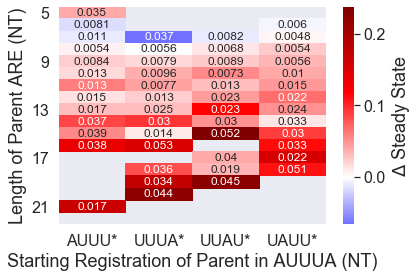

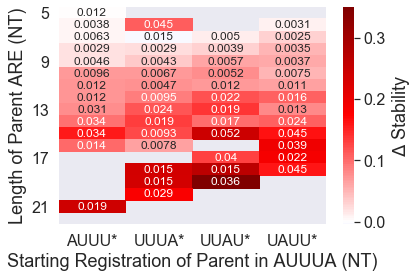

In [12]:
# Change in Steady State or Stability:


perfect_effectsize_T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_effectsize_T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_effectsize_T0_map[length-5,registration]=np.mean(referenceDF.effect_size_T0_GC_resid[~pd.isnull(referenceDF.effect_size_T0_GC_resid)&(referenceDF.parent_ARE_registration_perfect==registration)&(referenceDF.parent_ARE_length_perfect==length)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)&(referenceDF.CXCL7_ARE==0)])
        perfect_stderr_effectsize_T0_map[length-5,registration]=st.sem(referenceDF.effect_size_T0_GC_resid[~pd.isnull(referenceDF.effect_size_T0_GC_resid)&(referenceDF.parent_ARE_registration_perfect==registration)&(referenceDF.parent_ARE_length_perfect==length)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)&(referenceDF.CXCL7_ARE==0)])
        if not pd.isnull(perfect_stderr_effectsize_T0_map[length-5,registration]):
            if perfect_stderr_effectsize_T0_map[length-5,registration]>0.06:
                perfect_effectsize_T0_map[length-5,registration] = np.nan
                perfect_stderr_effectsize_T0_map[length-5,registration] = np.nan
        if pd.isnull(perfect_stderr_effectsize_T0_map[length-5,registration]):
            perfect_effectsize_T0_map[length-5,registration] = np.nan
        
perfect_effectsize_T4T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_effectsize_T4T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_effectsize_T4T0_map[length-5,registration]=np.mean(referenceDF.effect_size_T4T0_GC_resid[~pd.isnull(referenceDF.effect_size_T4T0_GC_resid)&(referenceDF.parent_ARE_registration_perfect==registration)&(referenceDF.parent_ARE_length_perfect==length)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)&(referenceDF.CXCL7_ARE==0)])
        perfect_stderr_effectsize_T4T0_map[length-5,registration]=st.sem(referenceDF.effect_size_T4T0_GC_resid[~pd.isnull(referenceDF.effect_size_T4T0_GC_resid)&(referenceDF.parent_ARE_registration_perfect==registration)&(referenceDF.parent_ARE_length_perfect==length)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)&(referenceDF.CXCL7_ARE==0)])
        if not pd.isnull(perfect_stderr_effectsize_T4T0_map[length-5,registration]):
            if perfect_stderr_effectsize_T4T0_map[length-5,registration]>0.06:
                perfect_effectsize_T4T0_map[length-5,registration] = np.nan
                perfect_stderr_effectsize_T4T0_map[length-5,registration] = np.nan
        if pd.isnull(perfect_stderr_effectsize_T4T0_map[length-5,registration]):
            perfect_effectsize_T4T0_map[length-5,registration] = np.nan
        
        
        
ax = sns.heatmap(perfect_effectsize_T0_map,yticklabels=range(5,23), annot = perfect_stderr_effectsize_T0_map,cmap='seismic',center=0)

plt.ylabel('Length of Parent ARE (NT)',fontsize=18)
plt.xlabel('Starting Registration of Parent in AUUUA (NT)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("$\Delta$ Steady State",fontsize=18)
plt.show()

ax = sns.heatmap(perfect_effectsize_T4T0_map,yticklabels=range(5,23), annot = perfect_stderr_effectsize_T4T0_map,cmap='seismic',center=0)
plt.ylabel('Length of Parent ARE (NT)',fontsize=18)
plt.xlabel('Starting Registration of Parent in AUUUA (NT)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("$\Delta$ Stability",fontsize=18)
plt.xlabel('Starting Registration of Parent in AUUUA (NT)')
plt.show()



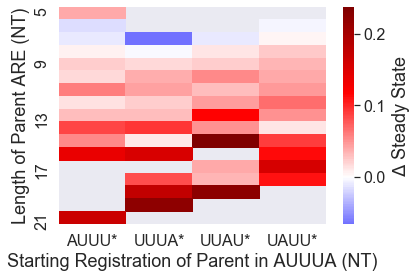

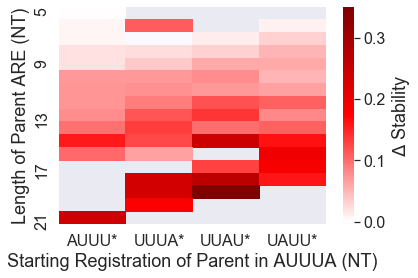

In [13]:
# No standard error:


perfect_effectsize_T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_effectsize_T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_effectsize_T0_map[length-5,registration]=np.mean(referenceDF.effect_size_T0_GC_resid[~pd.isnull(referenceDF.effect_size_T0_GC_resid)&(referenceDF.parent_ARE_registration_perfect==registration)&(referenceDF.parent_ARE_length_perfect==length)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)])
        perfect_stderr_effectsize_T0_map[length-5,registration]=st.sem(referenceDF.effect_size_T0_GC_resid[~pd.isnull(referenceDF.effect_size_T0_GC_resid)&(referenceDF.parent_ARE_registration_perfect==registration)&(referenceDF.parent_ARE_length_perfect==length)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)])
        if not pd.isnull(perfect_stderr_effectsize_T0_map[length-5,registration]):
            if perfect_stderr_effectsize_T0_map[length-5,registration]>0.06:
                perfect_effectsize_T0_map[length-5,registration] = np.nan
                perfect_stderr_effectsize_T0_map[length-5,registration] = np.nan
        if pd.isnull(perfect_stderr_effectsize_T0_map[length-5,registration]):
            perfect_effectsize_T0_map[length-5,registration] = np.nan
        
perfect_effectsize_T4T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_effectsize_T4T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_effectsize_T4T0_map[length-5,registration]=np.mean(referenceDF.effect_size_T4T0_GC_resid[~pd.isnull(referenceDF.effect_size_T4T0_GC_resid)&(referenceDF.parent_ARE_registration_perfect==registration)&(referenceDF.parent_ARE_length_perfect==length)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)])
        perfect_stderr_effectsize_T4T0_map[length-5,registration]=st.sem(referenceDF.effect_size_T4T0_GC_resid[~pd.isnull(referenceDF.effect_size_T4T0_GC_resid)&(referenceDF.parent_ARE_registration_perfect==registration)&(referenceDF.parent_ARE_length_perfect==length)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)])
        if not pd.isnull(perfect_stderr_effectsize_T4T0_map[length-5,registration]):
            if perfect_stderr_effectsize_T4T0_map[length-5,registration]>0.06:
                perfect_effectsize_T4T0_map[length-5,registration] = np.nan
                perfect_stderr_effectsize_T4T0_map[length-5,registration] = np.nan
        if pd.isnull(perfect_stderr_effectsize_T4T0_map[length-5,registration]):
            perfect_effectsize_T4T0_map[length-5,registration] = np.nan
        
ax = sns.heatmap(perfect_effectsize_T0_map[:-1,],yticklabels=range(5,22), cmap='seismic',center=0)
plt.ylabel('Length of Parent ARE (NT)',fontsize=18)
plt.xlabel('Starting Registration of Parent in AUUUA (NT)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("$\Delta$ Steady State",fontsize=18)
plt.show()

ax = sns.heatmap(perfect_effectsize_T4T0_map[:-1,],yticklabels=range(5,22), cmap='seismic',center=0)
plt.ylabel('Length of Parent ARE (NT)',fontsize=18)
plt.xlabel('Starting Registration of Parent in AUUUA (NT)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("$\Delta$ Stability",fontsize=18)
plt.show()









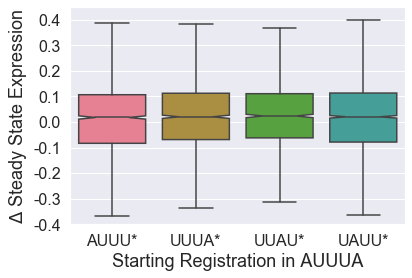

LinregressResult(slope=0.0015881587300563432, intercept=0.016298229841556447, rvalue=0.012528576887263044, pvalue=0.22616221203399922, stderr=0.0013121114077943696)


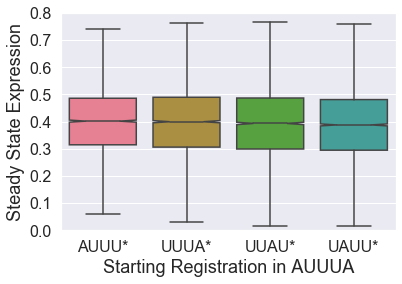

LinregressResult(slope=-0.004393267995211807, intercept=0.40131094842154147, rvalue=-0.03688315315545441, pvalue=8.761258273713051e-08, stderr=0.000820774333351522)


In [14]:
# Effect size
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_inUse = referenceDF[~pd.isnull(referenceDF.effect_size_T0_GC_resid)&~pd.isnull(referenceDF.parent_ARE_length_perfect)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)]
sns.boxplot(x="parent_ARE_registration_perfect",y="effect_size_T0_GC_resid",data=referenceDF_inUse,notch=True,fliersize=0)
plt.xlabel('Starting Registration in AUUUA',fontsize = 18)
plt.ylabel('$\Delta$ Steady State Expression',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
plt.ylim(-.4,.45)
ax.set_yticklabels(['-0.4','-0.3','-0.2','-0.1','0.0','0.1','0.2','0.3','0.4'],fontsize=16)
plt.show()

print(st.linregress(referenceDF_inUse.parent_ARE_registration_perfect,referenceDF_inUse.effect_size_T0_GC_resid))


# Ratios
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_inUse = referenceDF[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.ARE_length_perfect<23)]
sns.boxplot(x="ARE_registration_perfect",y="ratios_T0_GC_resid",data=referenceDF_inUse,notch=True,fliersize=0)
plt.xlabel('Starting Registration in AUUUA',fontsize = 18)
plt.ylabel('Steady State Expression',fontsize=18)
plt.ylim(0,.8)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
ax.set_yticklabels(['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8'],fontsize=16)
plt.show()


print(st.linregress(referenceDF_inUse.ARE_registration_perfect,referenceDF_inUse.ratios_T0_GC_resid))

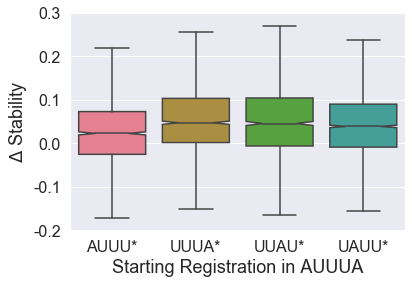

LinregressResult(slope=0.0026148209199960363, intercept=0.04036029683762578, rvalue=0.034030604133284424, pvalue=0.002086059298054711, stderr=0.0008493306388438636)


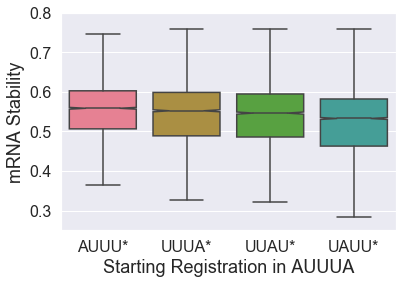

LinregressResult(slope=-0.009593111600945536, intercept=0.5489906776606862, rvalue=-0.11641127663704517, pvalue=1.324185948604862e-58, stderr=0.0005923156059768858)


In [15]:
# Effect size
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_inUse = referenceDF[~pd.isnull(referenceDF.effect_size_T4T0_GC_resid)&~pd.isnull(referenceDF.parent_ARE_length_perfect)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)]
sns.boxplot(x="parent_ARE_registration_perfect",y="effect_size_T4T0_GC_resid",data=referenceDF_inUse,notch=True,fliersize=0)
plt.xlabel('Starting Registration in AUUUA',fontsize = 18)
plt.ylabel('$\Delta$ Stability',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
ax.set_yticklabels(['-0.2','-0.1','0.0','0.1','0.2','0.3'],fontsize=16)
plt.ylim(-.2,.3)
plt.show()

print(st.linregress(referenceDF_inUse.parent_ARE_registration_perfect,referenceDF_inUse.effect_size_T4T0_GC_resid))


# Ratios
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_inUse = referenceDF[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.ARE_length_perfect<23)]
sns.boxplot(x="ARE_registration_perfect",y="ratios_T4T0_GC_resid",data=referenceDF_inUse,notch=True,fliersize=0)
plt.xlabel('Starting Registration in AUUUA',fontsize = 18)
plt.ylabel('mRNA Stability',fontsize=18)
plt.ylim(0.25,.8)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
ax.set_yticklabels(['','0.3','0.4','0.5','0.6','0.7','0.8'],fontsize=16)
plt.show()


print(st.linregress(referenceDF_inUse.ARE_registration_perfect,referenceDF_inUse.ratios_T4T0_GC_resid))

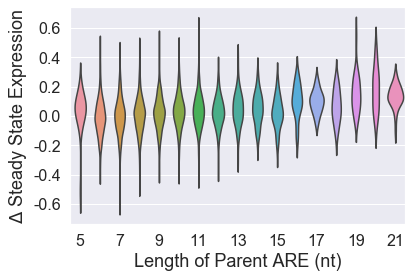

LinregressResult(slope=0.010689977720682607, intercept=-0.07327376100700825, rvalue=0.15762133412374746, pvalue=5.448144656722306e-53, stderr=0.0006932843178911213)


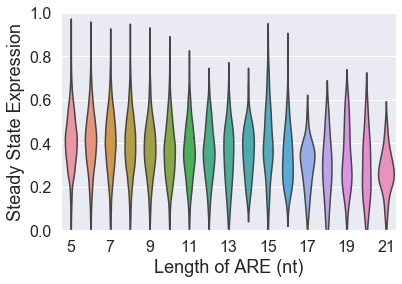

LinregressResult(slope=-0.008176144761764982, intercept=0.4559860188234614, rvalue=-0.12257914683580112, pvalue=3.215270822342838e-71, stderr=0.00045646149939735606)


In [16]:
# Effect size
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_inUse = referenceDF[~pd.isnull(referenceDF.effect_size_T0_GC_resid)&~pd.isnull(referenceDF.parent_ARE_length_perfect)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)]
sns.violinplot(x="parent_ARE_length_perfect",y="effect_size_T0_GC_resid",data=referenceDF_inUse,inner=None)
plt.xlabel('Length of Parent ARE (nt)',fontsize=18)
plt.ylabel('$\Delta$ Steady State Expression',fontsize=18)
ax.set_xticklabels(['5','','7','','9','','11','','13','','15','','17','','19','','21'],fontsize=16)
ax.set_yticklabels(['','-0.6','-0.4','-0.2','0.0','0.2','0.4','0.6','0.8'],fontsize=16)
plt.show()

print(st.linregress(referenceDF_inUse.parent_ARE_length_perfect,referenceDF_inUse.effect_size_T0_GC_resid))


# Ratios
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_inUse = referenceDF[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.ARE_length_perfect<23)]
sns.violinplot(x="ARE_length_perfect",y="ratios_T0_GC_resid",data=referenceDF_inUse,inner=None)
plt.xlabel('Length of ARE (nt)',fontsize = 18)
plt.ylabel('Steady State Expression',fontsize=18)
plt.ylim(0,1)
ax.set_xticklabels(['5','','7','','9','','11','','13','','15','','17','','19','','21'],fontsize=16)
ax.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'],fontsize=16)
plt.show()


print(st.linregress(referenceDF_inUse.ARE_length_perfect,referenceDF_inUse.ratios_T0_GC_resid))

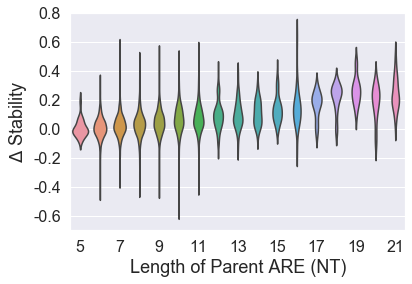

LinregressResult(slope=0.014713540692500044, intercept=-0.08285595301941516, rvalue=0.3672725997942131, pvalue=1.4492489089295454e-259, stderr=0.00041211712466607573)


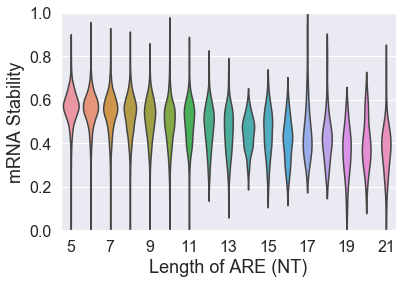

LinregressResult(slope=-0.013039634985171153, intercept=0.632213662335712, rvalue=-0.28589167874181187, pvalue=0.0, stderr=0.00031630037033480865)


In [17]:
# Effect size
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_inUse = referenceDF[~pd.isnull(referenceDF.effect_size_T4T0_GC_resid)&~pd.isnull(referenceDF.parent_ARE_length_perfect)&(referenceDF.hap=='mutated_ARE')&(referenceDF.biggest_ARE_mutated_list==1)]
sns.violinplot(x="parent_ARE_length_perfect",y="effect_size_T4T0_GC_resid",data=referenceDF_inUse,inner=None)
plt.xlabel('Length of Parent ARE (NT)',fontsize=18)
plt.ylabel('$\Delta$ Stability',fontsize=18)
ax.set_xticklabels(['5','','7','','9','','11','','13','','15','','17','','19','','21'],fontsize=16)
ax.set_yticklabels(['','-0.6','-0.4','-0.2','0.0','0.2','0.4','0.6','0.8'],fontsize=16)
plt.ylim(-.7,0.8)
plt.show()

print(st.linregress(referenceDF_inUse.parent_ARE_length_perfect,referenceDF_inUse.effect_size_T4T0_GC_resid))


# Ratios
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_inUse = referenceDF[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.ARE_length_perfect<23)]
sns.violinplot(x="ARE_length_perfect",y="ratios_T4T0_GC_resid",data=referenceDF_inUse,inner=None)
plt.xlabel('Length of ARE (NT)',fontsize = 18)
plt.ylabel('mRNA Stability',fontsize=18)
plt.ylim(0,1)
ax.set_xticklabels(['5','','7','','9','','11','','13','','15','','17','','19','','21'],fontsize=16)
ax.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'],fontsize=16)
plt.show()


print(st.linregress(referenceDF_inUse.ARE_length_perfect,referenceDF_inUse.ratios_T4T0_GC_resid))

# Redo some of the above with log ratios

In [18]:
#Some of the CXCL7 padding sequences have AREs -- we can account for these if desired...

cxcl7_list = ['SUPV3L1|10:70968792-70968830','TRPT1|11:63991271-63991346','ART4|12:14982266-14982303','POLE2|14:50116899-50116969','NMRAL1|16:4511716-4511779','ADPRM|17:10614462-10614520','NUP85|17:73231775-73231829','PPP1R15A|19:49379231-49379294','PQLC3|2:11300834-11300874','FASTKD1|2:170386287-170386333','TFPI|2:188343337-188343401','YBEY|21:47717549-47717616','ALG1L|3:125648118-125648193','HELQ|4:84328529-84328604','TMEM171|5:72427558-72427617','IL4|5:132018280-132018347','PCDHA11|5:140251122-140251185','PCDHA12|5:140257437-140257474','GIN1|5:102423545-102423600','HLA-DQA1|6:32610542-32610561','CCDC132|7:92905660-92905721','NAPRT|8:144656955-144657006']
CXCL7_ARE_list = []
for region in referenceDF_logratio.region:
    if region in cxcl7_list:
        CXCL7_ARE_list.append(1)
    else:
        CXCL7_ARE_list.append(0)
referenceDF_logratio['CXCL7_ARE']=CXCL7_ARE_list

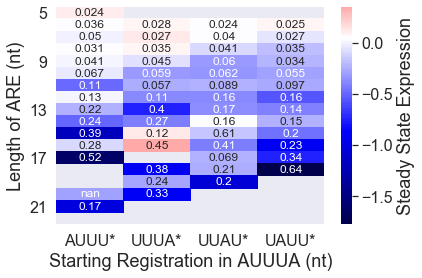

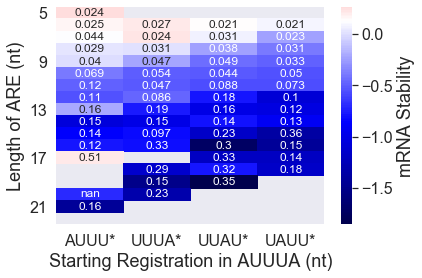

In [20]:
#CXCL7

# Not Sensoring Data if SEM is too large:
perfect_ratio_T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_ratio_T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_ratio_T0_map[length-5,registration]=np.mean(referenceDF_logratio.ratios_T0_GC_resid[~pd.isnull(referenceDF_logratio.ratios_T0_GC_resid)&(referenceDF_logratio.ARE_registration_perfect==registration)&(referenceDF_logratio.ARE_length_perfect==length)&(referenceDF_logratio.CXCL7_ARE==0)])
        perfect_stderr_ratio_T0_map[length-5,registration]=st.sem(referenceDF_logratio.ratios_T0_GC_resid[~pd.isnull(referenceDF_logratio.ratios_T0_GC_resid)&(referenceDF_logratio.ARE_registration_perfect==registration)&(referenceDF_logratio.ARE_length_perfect==length)&(referenceDF_logratio.CXCL7_ARE==0)])
                
perfect_ratio_T4T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_ratio_T4T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_ratio_T4T0_map[length-5,registration]=np.mean(referenceDF_logratio.ratios_T4T0_GC_resid[~pd.isnull(referenceDF_logratio.ratios_T4T0_GC_resid)&(referenceDF_logratio.ARE_registration_perfect==registration)&(referenceDF_logratio.ARE_length_perfect==length)&(referenceDF_logratio.CXCL7_ARE==0)])
        perfect_stderr_ratio_T4T0_map[length-5,registration]=st.sem(referenceDF_logratio.ratios_T4T0_GC_resid[~pd.isnull(referenceDF_logratio.ratios_T4T0_GC_resid)&(referenceDF_logratio.ARE_registration_perfect==registration)&(referenceDF_logratio.ARE_length_perfect==length)&(referenceDF_logratio.CXCL7_ARE==0)])
  
        
ax = sns.heatmap(perfect_ratio_T0_map,yticklabels=range(5,23), annot = perfect_stderr_ratio_T0_map,cmap = 'seismic',center = np.mean(referenceDF_logratio.ratios_T0_GC_resid[~pd.isnull(referenceDF_logratio.ratios_T0_GC_resid)&pd.isnull(referenceDF_logratio.ARE_registration_perfect)&(referenceDF_logratio.CXCL7_ARE==0)]))
plt.ylabel('Length of ARE (nt)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
plt.xlabel('Starting Registration in AUUUA (nt)',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("Steady State Expression",fontsize=18)
plt.show()

ax = sns.heatmap(perfect_ratio_T4T0_map,yticklabels=range(5,23), annot = perfect_stderr_ratio_T4T0_map,cmap = 'seismic',center = np.mean(referenceDF_logratio.ratios_T4T0_GC_resid[~pd.isnull(referenceDF_logratio.ratios_T4T0_GC_resid)&pd.isnull(referenceDF_logratio.ARE_registration_perfect)&(referenceDF_logratio.CXCL7_ARE==0)]))
plt.ylabel('Length of ARE (nt)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
plt.xlabel('Starting Registration in AUUUA (nt)',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("mRNA Stability",fontsize=18)
plt.show()




In [21]:
# It helps to make a "parent_ARE_length_perfect" and a "parent_ARE_registration_perfect" variable:
referenceDF_logratio_byOligo = referenceDF_logratio.copy()
referenceDF_logratio_byOligo.index = referenceDF_logratio_byOligo.ids
parent_ARE_length_perfect_list = []
parent_ARE_registration_perfect_list = []
for parent_oligo in referenceDF_logratio_byOligo.parent_control_oligo:
    if parent_oligo in referenceDF_logratio_byOligo.ids.values:
        parent_ARE_length_perfect_list.append(referenceDF_logratio_byOligo.loc[parent_oligo,'ARE_length_perfect'])
        parent_ARE_registration_perfect_list.append(referenceDF_logratio_byOligo.loc[parent_oligo,'ARE_registration_perfect'])
    else:
        parent_ARE_length_perfect_list.append(np.nan)
        parent_ARE_registration_perfect_list.append(np.nan)
referenceDF_logratio['parent_ARE_length_perfect'] = parent_ARE_length_perfect_list
referenceDF_logratio['parent_ARE_registration_perfect'] = parent_ARE_registration_perfect_list

In [22]:
#Let's check whether the mutated ARE is the biggest in the sequence:
biggest_ARE_mutated_list = []
mutated_counter = 0
notmutated_counter = 0
referenceDF_logratio_byOligo = referenceDF_logratio.copy()
referenceDF_logratio_byOligo.index = referenceDF_logratio.ids
for oligo, parent_oligo in zip(referenceDF_logratio.ids,referenceDF_logratio.parent_control_oligo):
    if not pd.isnull(parent_oligo):
        if (referenceDF_logratio_byOligo.loc[oligo,'hap']=='mutated_ARE'):
            if referenceDF_logratio_byOligo.loc[oligo,'parent_ARE_length_perfect']==referenceDF_logratio_byOligo.loc[oligo,'ARE_length_perfect']:
                notmutated_counter+=1
                biggest_ARE_mutated_list.append(0)
            else:
                mutated_counter+=1
                biggest_ARE_mutated_list.append(1)
        else:
            biggest_ARE_mutated_list.append(0)
    else:
        biggest_ARE_mutated_list.append(0)
referenceDF_logratio['biggest_ARE_mutated_list']=biggest_ARE_mutated_list

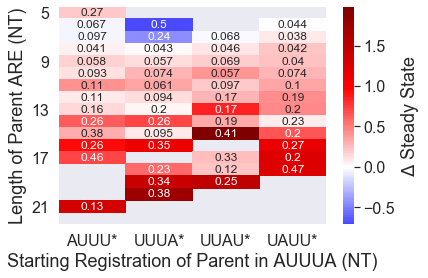

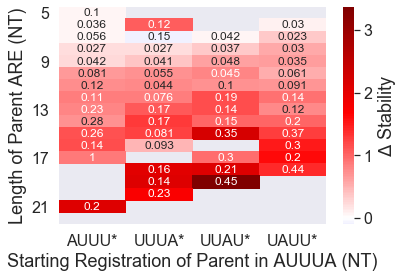

In [24]:
# Change in Steady State or Stability:


perfect_effectsize_T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_effectsize_T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_effectsize_T0_map[length-5,registration]=np.mean(referenceDF_logratio.effect_size_T0_GC_resid[~pd.isnull(referenceDF_logratio.effect_size_T0_GC_resid)&(referenceDF_logratio.parent_ARE_registration_perfect==registration)&(referenceDF_logratio.parent_ARE_length_perfect==length)&(referenceDF_logratio.hap=='mutated_ARE')&(referenceDF_logratio.biggest_ARE_mutated_list==1)&(referenceDF_logratio.CXCL7_ARE==0)])
        perfect_stderr_effectsize_T0_map[length-5,registration]=st.sem(referenceDF_logratio.effect_size_T0_GC_resid[~pd.isnull(referenceDF_logratio.effect_size_T0_GC_resid)&(referenceDF_logratio.parent_ARE_registration_perfect==registration)&(referenceDF_logratio.parent_ARE_length_perfect==length)&(referenceDF_logratio.hap=='mutated_ARE')&(referenceDF_logratio.biggest_ARE_mutated_list==1)&(referenceDF_logratio.CXCL7_ARE==0)])
        if pd.isnull(perfect_stderr_effectsize_T0_map[length-5,registration]):
            perfect_effectsize_T0_map[length-5,registration] = np.nan
        
perfect_effectsize_T4T0_map = np.ones([22-4,4])*np.nan
perfect_stderr_effectsize_T4T0_map = np.ones([22-4,4])*np.nan
for length in range(5,23):
    for registration in range(0,4):
        perfect_effectsize_T4T0_map[length-5,registration]=np.mean(referenceDF_logratio.effect_size_T4T0_GC_resid[~pd.isnull(referenceDF_logratio.effect_size_T4T0_GC_resid)&(referenceDF_logratio.parent_ARE_registration_perfect==registration)&(referenceDF_logratio.parent_ARE_length_perfect==length)&(referenceDF_logratio.hap=='mutated_ARE')&(referenceDF_logratio.biggest_ARE_mutated_list==1)&(referenceDF_logratio.CXCL7_ARE==0)])
        perfect_stderr_effectsize_T4T0_map[length-5,registration]=st.sem(referenceDF_logratio.effect_size_T4T0_GC_resid[~pd.isnull(referenceDF_logratio.effect_size_T4T0_GC_resid)&(referenceDF_logratio.parent_ARE_registration_perfect==registration)&(referenceDF_logratio.parent_ARE_length_perfect==length)&(referenceDF_logratio.hap=='mutated_ARE')&(referenceDF_logratio.biggest_ARE_mutated_list==1)&(referenceDF_logratio.CXCL7_ARE==0)])
        if pd.isnull(perfect_stderr_effectsize_T4T0_map[length-5,registration]):
            perfect_effectsize_T4T0_map[length-5,registration] = np.nan
        
        
        
ax = sns.heatmap(perfect_effectsize_T0_map,yticklabels=range(5,23), annot = perfect_stderr_effectsize_T0_map,cmap='seismic',center=0)

plt.ylabel('Length of Parent ARE (NT)',fontsize=18)
plt.xlabel('Starting Registration of Parent in AUUUA (NT)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("$\Delta$ Steady State",fontsize=18)
plt.show()

ax = sns.heatmap(perfect_effectsize_T4T0_map,yticklabels=range(5,23), annot = perfect_stderr_effectsize_T4T0_map,cmap='seismic',center=0)
plt.ylabel('Length of Parent ARE (NT)',fontsize=18)
plt.xlabel('Starting Registration of Parent in AUUUA (NT)',fontsize=18)
ax.set_yticklabels(['5','','','','9','','','','13','','','','17','','','','21'],fontsize=16)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label("$\Delta$ Stability",fontsize=18)
plt.xlabel('Starting Registration of Parent in AUUUA (NT)')
plt.show()





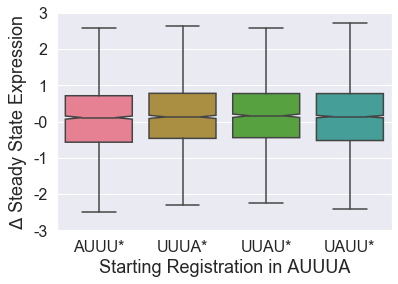

LinregressResult(slope=0.01766744361521029, intercept=0.13008217838631814, rvalue=0.01823478885735693, pvalue=0.07813328655260023, stderr=0.010027978516300103)


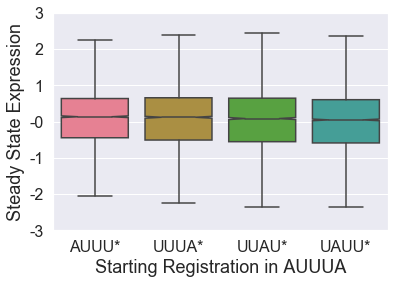

LinregressResult(slope=-0.036540543305407444, intercept=0.029349288685149907, rvalue=-0.03892329372179227, pvalue=1.63376585882349e-08, stderr=0.00646838554405637)


In [31]:
# Effect size
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_logratio_inUse = referenceDF_logratio[~pd.isnull(referenceDF_logratio.effect_size_T0_GC_resid)&~pd.isnull(referenceDF_logratio.parent_ARE_length_perfect)&(referenceDF_logratio.hap=='mutated_ARE')&(referenceDF_logratio.biggest_ARE_mutated_list==1)]
sns.boxplot(x="parent_ARE_registration_perfect",y="effect_size_T0_GC_resid",data=referenceDF_logratio_inUse,notch=True,fliersize=0)
plt.xlabel('Starting Registration in AUUUA',fontsize = 18)
plt.ylabel('$\Delta$ Steady State Expression',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
plt.ylim(-3,3)
ax.set_yticklabels(['-3','-2','-1','-0','1','2','3'],fontsize=16)
plt.show()

print(st.linregress(referenceDF_logratio_inUse.parent_ARE_registration_perfect,referenceDF_logratio_inUse.effect_size_T0_GC_resid))


# Ratios
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_logratio_inUse = referenceDF_logratio[~pd.isnull(referenceDF_logratio.ratios_T0_GC_resid)&(referenceDF_logratio.ARE_length_perfect<23)]
sns.boxplot(x="ARE_registration_perfect",y="ratios_T0_GC_resid",data=referenceDF_logratio_inUse,notch=True,fliersize=0)
plt.xlabel('Starting Registration in AUUUA',fontsize = 18)
plt.ylabel('Steady State Expression',fontsize=18)
plt.ylim(-3,3)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
ax.set_yticklabels(['-3','-2','-1','-0','1','2','3'],fontsize=16)
plt.show()


print(st.linregress(referenceDF_logratio_inUse.ARE_registration_perfect,referenceDF_logratio_inUse.ratios_T0_GC_resid))

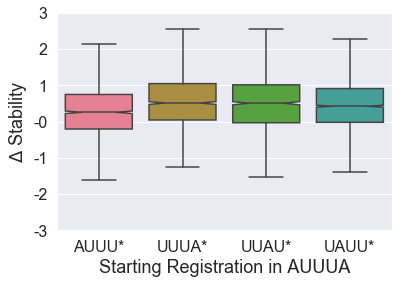

LinregressResult(slope=0.030970841901165357, intercept=0.40900214712842037, rvalue=0.04460636865573114, pvalue=5.4601987982328864e-05, stderr=0.0076714907695530936)


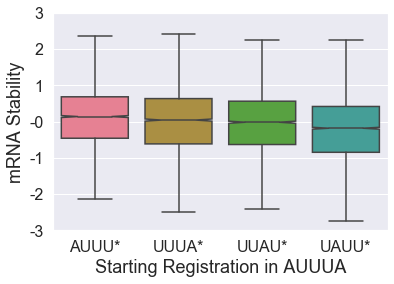

LinregressResult(slope=-0.1021711995085579, intercept=0.0846900743696515, rvalue=-0.12488734024237068, pvalue=3.0629080459468474e-67, stderr=0.005874191688202754)


In [34]:
# Effect size
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_logratio_inUse = referenceDF_logratio[~pd.isnull(referenceDF_logratio.effect_size_T4T0_GC_resid)&~pd.isnull(referenceDF_logratio.parent_ARE_length_perfect)&(referenceDF_logratio.hap=='mutated_ARE')&(referenceDF_logratio.biggest_ARE_mutated_list==1)]
sns.boxplot(x="parent_ARE_registration_perfect",y="effect_size_T4T0_GC_resid",data=referenceDF_logratio_inUse,notch=True,fliersize=0)
plt.xlabel('Starting Registration in AUUUA',fontsize = 18)
plt.ylabel('$\Delta$ Stability',fontsize=18)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
plt.ylim(-3,3)
ax.set_yticklabels(['-3','-2','-1','-0','1','2','3'],fontsize=16)
plt.show()

print(st.linregress(referenceDF_logratio_inUse.parent_ARE_registration_perfect,referenceDF_logratio_inUse.effect_size_T4T0_GC_resid))


# Ratios
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_logratio_inUse = referenceDF_logratio[~pd.isnull(referenceDF_logratio.ratios_T4T0_GC_resid)&(referenceDF_logratio.ARE_length_perfect<23)]
sns.boxplot(x="ARE_registration_perfect",y="ratios_T4T0_GC_resid",data=referenceDF_logratio_inUse,notch=True,fliersize=0)
plt.xlabel('Starting Registration in AUUUA',fontsize = 18)
plt.ylabel('mRNA Stability',fontsize=18)
plt.ylim(-3,3)
ax.set_xticklabels(['AUUU*','UUUA*','UUAU*','UAUU*'],fontsize=16)
ax.set_yticklabels(['-3','-2','-1','-0','1','2','3'],fontsize=16)
plt.show()


print(st.linregress(referenceDF_logratio_inUse.ARE_registration_perfect,referenceDF_logratio_inUse.ratios_T4T0_GC_resid))

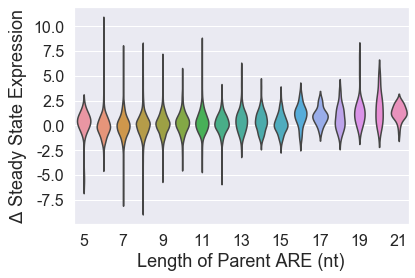

LinregressResult(slope=0.07587490560888432, intercept=-0.4946387743377689, rvalue=0.14637117240661363, pvalue=7.286634602677841e-46, stderr=0.005308262755475381)


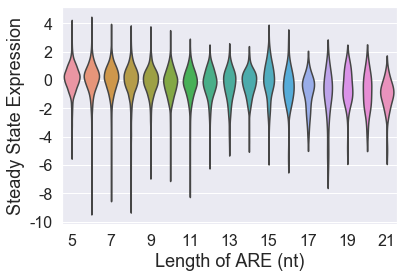

LinregressResult(slope=-0.06298048800993566, intercept=0.446195654330211, rvalue=-0.1198031621801357, pvalue=4.323604060861831e-68, stderr=0.003598804048635198)


In [38]:
# Effect size
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_logratio_inUse = referenceDF_logratio[~pd.isnull(referenceDF_logratio.effect_size_T0_GC_resid)&~pd.isnull(referenceDF_logratio.parent_ARE_length_perfect)&(referenceDF_logratio.hap=='mutated_ARE')&(referenceDF_logratio.biggest_ARE_mutated_list==1)]
sns.violinplot(x="parent_ARE_length_perfect",y="effect_size_T0_GC_resid",data=referenceDF_logratio_inUse,inner=None)
plt.xlabel('Length of Parent ARE (nt)',fontsize=18)
plt.ylabel('$\Delta$ Steady State Expression',fontsize=18)
ax.set_xticklabels(['5','','7','','9','','11','','13','','15','','17','','19','','21'],fontsize=16)
ax.set_yticklabels(['','-7.5','-5.0','-2.5','0.0','2.5','5.0','7.5','10.0'],fontsize=16)
plt.show()

print(st.linregress(referenceDF_logratio_inUse.parent_ARE_length_perfect,referenceDF_logratio_inUse.effect_size_T0_GC_resid))


# Ratios
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_logratio_inUse = referenceDF_logratio[~pd.isnull(referenceDF_logratio.ratios_T0_GC_resid)&(referenceDF_logratio.ARE_length_perfect<23)]
sns.violinplot(x="ARE_length_perfect",y="ratios_T0_GC_resid",data=referenceDF_logratio_inUse,inner=None)
plt.xlabel('Length of ARE (nt)',fontsize = 18)
plt.ylabel('Steady State Expression',fontsize=18)
ax.set_xticklabels(['5','','7','','9','','11','','13','','15','','17','','19','','21'],fontsize=16)
ax.set_yticklabels(['','-10','-8','-6','-4','-2','0','2','4'],fontsize=16)
plt.show()


print(st.linregress(referenceDF_logratio_inUse.ARE_length_perfect,referenceDF_logratio_inUse.ratios_T0_GC_resid))

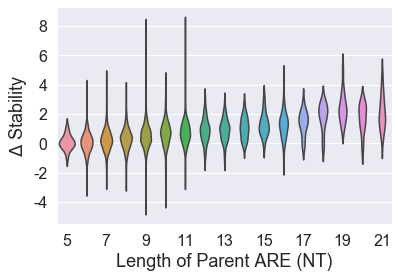

LinregressResult(slope=0.13680846374513297, intercept=-0.7252570801924234, rvalue=0.3779205000873305, pvalue=6.1915386448985375e-276, stderr=0.003706838460746115)


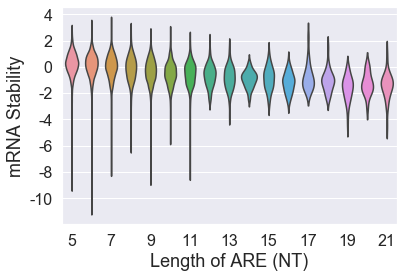

LinregressResult(slope=-0.1307793846389514, intercept=0.9098679982725512, rvalue=-0.2888216462113814, pvalue=0.0, stderr=0.003137232944418463)


In [42]:
# Effect size
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_logratio_inUse = referenceDF_logratio[~pd.isnull(referenceDF_logratio.effect_size_T4T0_GC_resid)&~pd.isnull(referenceDF_logratio.parent_ARE_length_perfect)&(referenceDF_logratio.hap=='mutated_ARE')&(referenceDF_logratio.biggest_ARE_mutated_list==1)]
sns.violinplot(x="parent_ARE_length_perfect",y="effect_size_T4T0_GC_resid",data=referenceDF_logratio_inUse,inner=None)
plt.xlabel('Length of Parent ARE (NT)',fontsize=18)
plt.ylabel('$\Delta$ Stability',fontsize=18)
ax.set_xticklabels(['5','','7','','9','','11','','13','','15','','17','','19','','21'],fontsize=16)
ax.set_yticklabels(['','-4','-2','0','2','4','6','8'],fontsize=16)
# plt.ylim(-.7,0.8)
plt.show()

print(st.linregress(referenceDF_logratio_inUse.parent_ARE_length_perfect,referenceDF_logratio_inUse.effect_size_T4T0_GC_resid))


# Ratios
#
#Length Dimension First:
fig,ax = plt.subplots()
referenceDF_logratio_inUse = referenceDF_logratio[~pd.isnull(referenceDF_logratio.ratios_T4T0_GC_resid)&(referenceDF_logratio.ARE_length_perfect<23)]
sns.violinplot(x="ARE_length_perfect",y="ratios_T4T0_GC_resid",data=referenceDF_logratio_inUse,inner=None)
plt.xlabel('Length of ARE (NT)',fontsize = 18)
plt.ylabel('mRNA Stability',fontsize=18)
# plt.ylim(0,1)
ax.set_xticklabels(['5','','7','','9','','11','','13','','15','','17','','19','','21'],fontsize=16)
ax.set_yticklabels(['','-10','-8','-6','-4','-2','0','2','4'],fontsize=16)
plt.show()


print(st.linregress(referenceDF_logratio_inUse.ARE_length_perfect,referenceDF_logratio_inUse.ratios_T4T0_GC_resid))